Train a GPR model with "Coulombmatrix eigenvalue featurization" and check performance by r2_score, MSE, MAE

In [26]:
# Train a GPR model with RDkit featurization
import deepchem as dc
import pandas as pd
import numpy as np
import rdkit
import sklearn

In [27]:
#load the dataset (polymer smiles and their ioization energy)
print("loading the data...")
loader = dc.data.CSVLoader(["Egc"], feature_field="smiles",featurizer=dc.feat.CoulombMatrixEig(max_atoms=22))
Data = loader.create_dataset('../csv_reader/Polymers_Egc.csv')

[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (1)
c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchem\feat\molecule_featurizers\coulomb_matrices.py:151: RuntimeWarning: divide by zero encountered in divide
  m = np.outer(z, z) / d
c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchem\feat\molecule_featurizers\coulomb_matrices.py:151: RuntimeWarning: invalid value encountered in divide
  m = np.outer(z, z) / d
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (1)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (1)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (5)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (7)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:

[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (7)
Failed to featurize datapoint 12, *C=CCCCCCCCCCC*. Appending empty array
Exception message: 
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (5)
Failed to featurize datapoint 13, *C=CCCCCCC*. Appending empty array
Exception message: 
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (4)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (4)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (5)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (6)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (2)
Failed to featurize datapoint 18, *C=CC(C*)C(C)CC. Appending empty array


loading the data...


Exception message: 
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (5)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (11)
Failed to featurize datapoint 20, *CC(*)c1ccccc1C(=O)OC. Appending empty array
Exception message: 
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (7)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (6)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (6)
Failed to featurize datapoint 23, *CC(*)c1ccc(CCCCCC)cc1. Appending empty array
Exception message: 
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (0)
[09:50:33] UFFTYPER: Unrecognized atom type: *_ (6)
Failed to featurize datapoint 24, *CC(*)c1ccc(CCCCCCCCCCCCCCCC)cc1. Appending empty array
Exception message: 
[09:50:33] UFFTYPER: Unrecognized atom type: *

#since the featurizer has difficulties with reading the raw smiles trings, we first convert these to rdkit objects.
Data = pd.read_csv('../csv_reader/Datafile2.csv', usecols=["smiles","Ei"])
from rdkit import Chem

TempData = Data.values.tolist() #change the dataframe to a loopable list
RdkitObj = []

for molecule in TempData:
    mol = Chem.MolFromSmiles(molecule[0])
    RdkitObj.append(mol) #add all the converted smiles trings to the array

#now featurize the rdkitobj with the coulombmatrixEig featurizer.
featurizer = dc.feat.CoulombMatrixEig(max_atoms=23)
FeaturizedX = featurizer.featurize(RdkitObj)
#make the dc dataset

Dataset = dc.data.DiskDataset.from_numpy(X=FeaturizedX, y=Data.Ei, ids=Data.smiles, tasks = ["EgC"])
Dataset.X[0]



In [28]:
#split the dataset using the random splitter
splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(Data)
print("Data is splitted into: train, valid, test")

Data is splitted into: train, valid, test


In [29]:
# create the GPR model & fit the model
from sklearn.gaussian_process import GaussianProcessRegressor
model = dc.models.SklearnModel(GaussianProcessRegressor( n_restarts_optimizer=2))

print("fitting model...")
model.fit(train_dataset)
print("model is fitted")


fitting model...
model is fitted


In [30]:
#calculate r2 score
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print('Training set score:', model.evaluate(train_dataset, metric))
print('Test set score:', model.evaluate(test_dataset, metric))

Training set score: {'pearson_r2_score': 1.0}
Test set score: {'pearson_r2_score': 0.0029348467570794136}


In [31]:
#calculate MSE score
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
print('Training set score:', model.evaluate(train_dataset, metric))
print('Test set score:', model.evaluate(test_dataset, metric))

Training set score: {'mean_squared_error': 2.7380771499714714e-19}
Test set score: {'mean_squared_error': 22.321517137382287}


In [32]:
#calculate MAE score
metric = dc.metrics.Metric(dc.metrics.mean_absolute_error)
print('Training set score:', model.evaluate(train_dataset, metric))
print('Test set score:', model.evaluate(test_dataset, metric))

Training set score: {'mean_absolute_error': 4.656305320266371e-10}
Test set score: {'mean_absolute_error': 4.325152607666566}


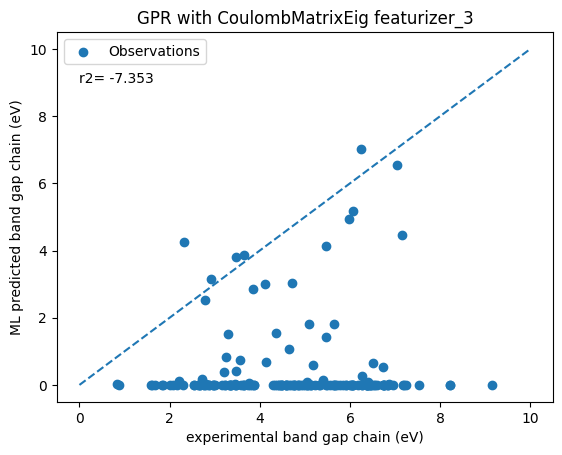

In [33]:
#plot the data
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#predict the r2_score and convert to string
predicted = model.predict(test_dataset)
score =r2_score(test_dataset.y, predicted)
text = "r2= "+ str(round(score,3))

x=[0,10]
y=[0,10]
plt.plot(x, y, linestyle="dashed")
plt.scatter(test_dataset.y, predicted, label="Observations")
plt.legend()
plt.xlabel("experimental band gap chain (eV)")
plt.ylabel("ML predicted band gap chain (eV)")
plt.title("GPR with CoulombMatrixEig featurizer_3")
plt.text(0,9,text)
plt.show()